In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
plt.style.use('seaborn')

%matplotlib inline

In [2]:
#Importing data from the well header worksheet
well_header=pd.read_csv('WellHeader_Datathon_edited.csv')

In [3]:
well_header.head()

,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorParentName,Licensee,LicenseeParentCompany,LicenseeParentCompanyName,...,StatusSource,UnitID,UnitName,UnitFlag,Municipality,CompletionDate,Agent,_Completed`Flag,_Perf`Flag,Match
0,2587301,Alberta,475898,100122706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AER,NaN,NaN,No,NaN,NaN,Unspecified,1,1,Yes
1,2593278,Alberta,479407,102052706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AER,NaN,NaN,No,NaN,NaN,Unspecified,1,1,Yes
2,2579437,Alberta,469132,100162206624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AER,NaN,NaN,No,NaN,NaN,Unspecified,1,1,Yes
3,2591761,Alberta,478708,100092206624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AER,NaN,NaN,No,NaN,NaN,Unspecified,1,1,Yes
4,2587302,Alberta,475923,100082206624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,...,AER,NaN,NaN,No,NaN,NaN,Unspecified,1,1,Yes


In [4]:
well_header.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EPAssetsId,10436.0,1.609559e+06,960903.274006,3373.000000,1.159959e+06,1.171592e+06,2.602619e+06,2.625908e+06
CurrentOperatorParent,10436.0,1.990939e+03,2719.980325,16.000000,2.470000e+02,1.187000e+03,1.613000e+03,9.901000e+03
LicenseeParentCompany,10436.0,1.999133e+03,2725.435780,16.000000,2.470000e+02,1.187000e+03,1.613000e+03,9.901000e+03
AbandonDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SurfAbandonDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Longitude,10436.0,-1.138207e+02,6.242177,-122.939258,-1.187265e+02,-1.134081e+02,-1.090770e+02,0.000000e+00
Surf_Latitude,10436.0,5.320227e+01,2.609611,0.000000,5.161127e+01,5.229285e+01,5.477499e+01,5.752191e+01
BH_Longitude,8696.0,-1.125419e+02,4.094611,-119.999593,-1.169032e+02,-1.104889e+02,-1.089319e+02,-1.077269e+02
BH_Latitude,8696.0,5.266497e+01,1.430057,49.964650,5.156799e+01,5.192357e+01,5.422217e+01,5.658039e+01
GroundElevation,10428.0,7.852791e+02,157.422631,565.200000,6.941000e+02,7.271000e+02,8.597000e+02,9.914000e+03


In [5]:
well_header.isnull().sum()

EPAssetsId            0
Province              0
LicenceNumber         0
UWI                   0
CurrentOperator       0
                   ... 
CompletionDate     4586
Agent                 0
_Completed`Flag       0
_Perf`Flag            0
Match                 0
Length: 89, dtype: int64

In [6]:
well_cut=well_header[well_header.Formation!='Cardium']

In [7]:
outlier=well_cut[['EPAssetsId','TotalDepth', 'TVD']]

In [8]:
outlier=outlier[outlier.TVD.notnull()]

In [9]:
outlier_data=pd.DataFrame(outlier.iloc[:,1:])
outlier_data

,TotalDepth,TVD
1,3607.0,1954.58
2,3502.0,1940.06
3,3491.0,1945.01
4,3578.0,1956.34
5,3659.0,1911.62
...,...,...
10425,2024.0,891.82
10428,2002.0,896.85
10429,2227.0,897.58
10430,2068.0,888.62


In [10]:
#Training the model
from sklearn.ensemble import IsolationForest
seed=12345
model11=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model11.fit(outlier_data)

IsolationForest(contamination=0.01, n_jobs=-1, random_state=42)

In [11]:
IF_predict=model11.predict(outlier_data)
IF_score=model11.score_samples(outlier_data)

In [12]:
IF_predictions = pd.DataFrame({"predicted_class": list(map(lambda IF: 1*(IF == -1), IF_predict)), "predict": IF_score})
IF_predictions

,predicted_class,predict
0,0,-0.623186
1,0,-0.642443
2,0,-0.641585
3,0,-0.631341
4,0,-0.632556
...,...,...
5578,0,-0.469359
5579,0,-0.469699
5580,0,-0.492126
5581,0,-0.475728


In [13]:
outlier['anomaly']=IF_predict
outlier

,EPAssetsId,TotalDepth,TVD,anomaly
1,2593278,3607.0,1954.58,1
2,2579437,3502.0,1940.06,1
3,2591761,3491.0,1945.01,1
4,2587302,3578.0,1956.34,1
5,2600942,3659.0,1911.62,1
...,...,...,...,...
10425,2612600,2024.0,891.82,1
10428,2605004,2002.0,896.85,1
10429,2605001,2227.0,897.58,1
10430,2619591,2068.0,888.62,1


In [14]:
outlier[outlier.anomaly==-1].count()

EPAssetsId    56
TotalDepth    56
TVD           56
anomaly       56
dtype: int64

In [15]:
well_cut_new=outlier[outlier.anomaly==1]
well_cut_new

,EPAssetsId,TotalDepth,TVD,anomaly
1,2593278,3607.0,1954.58,1
2,2579437,3502.0,1940.06,1
3,2591761,3491.0,1945.01,1
4,2587302,3578.0,1956.34,1
5,2600942,3659.0,1911.62,1
...,...,...,...,...
10425,2612600,2024.0,891.82,1
10428,2605004,2002.0,896.85,1
10429,2605001,2227.0,897.58,1
10430,2619591,2068.0,888.62,1


In [16]:
new_data=pd.merge(well_cut,well_cut_new, on=['EPAssetsId','TotalDepth','TVD'])
#'EPAssetsId','TVD','WellProfile','WellType','LaheeClass','CurrentStatus','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation'

In [17]:
well_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9289 entries, 0 to 10432
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EPAssetsId                 9289 non-null   int64  
 1   Province                   9289 non-null   object 
 2   LicenceNumber              9289 non-null   object 
 3   UWI                        9289 non-null   object 
 4   CurrentOperator            9289 non-null   object 
 5   CurrentOperatorParent      9289 non-null   int64  
 6   CurrentOperatorParentName  9289 non-null   object 
 7   Licensee                   9289 non-null   object 
 8   LicenseeParentCompany      9289 non-null   int64  
 9   LicenseeParentCompanyName  9289 non-null   object 
 10  LicenceDate                9289 non-null   object 
 11  CurrentStatus              9289 non-null   object 
 12  CurrentStatusStandardised  9289 non-null   object 
 13  WellType                   9289 non-null   obje

# Whole-dataset

In [53]:
#Variables selection for the model
all_wells=well_cut[['EPAssetsId','TVD','Formation','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation']]
data_wells=all_wells[all_wells.TVD.notnull()]
data_wells.columns=['EPAssetsId','TVD','Formation','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation']
data_wells

,EPAssetsId,TVD,Formation,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation
1,2593278,1954.58,Montney,3607.0,-117.527042,54.737446,770.8
2,2579437,1940.06,Montney,3502.0,-117.559923,54.730864,759.4
3,2591761,1945.01,Montney,3491.0,-117.560141,54.730703,759.8
4,2587302,1956.34,Montney,3578.0,-117.561283,54.723339,767.7
5,2600942,1911.62,Montney,3659.0,-117.639433,54.787071,725.0
...,...,...,...,...,...,...,...
10425,2612600,891.82,Viking,2024.0,-111.146918,51.913412,784.8
10428,2605004,896.85,Viking,2002.0,-111.183763,51.920839,785.8
10429,2605001,897.58,Viking,2227.0,-111.183762,51.920983,785.5
10430,2619591,888.62,Viking,2068.0,-111.199446,51.895504,777.7


In [54]:
#Creating dummies for categorical variables WellProfile and WellType

#all_profile_dummies = pd.get_dummies(data_wells.WellProfile, prefix='WellProfile').iloc[:,1:]
#all_type_dummies = pd.get_dummies(data_wells.WellType, prefix='WellType').iloc[:,1:]
#all_status_dummies = pd.get_dummies(data_wells.CurrentStatus, prefix='Status').iloc[:,1:]
all_formation_dummies = pd.get_dummies(data_wells.Formation, prefix='Formation').iloc[:,1:]

df_all = pd.concat([data_wells,all_formation_dummies], axis=1)
df_all

,EPAssetsId,TVD,Formation,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,Formation_Montney,Formation_Viking
1,2593278,1954.58,Montney,3607.0,-117.527042,54.737446,770.8,1,0
2,2579437,1940.06,Montney,3502.0,-117.559923,54.730864,759.4,1,0
3,2591761,1945.01,Montney,3491.0,-117.560141,54.730703,759.8,1,0
4,2587302,1956.34,Montney,3578.0,-117.561283,54.723339,767.7,1,0
5,2600942,1911.62,Montney,3659.0,-117.639433,54.787071,725.0,1,0
...,...,...,...,...,...,...,...,...,...
10425,2612600,891.82,Viking,2024.0,-111.146918,51.913412,784.8,0,1
10428,2605004,896.85,Viking,2002.0,-111.183763,51.920839,785.8,0,1
10429,2605001,897.58,Viking,2227.0,-111.183762,51.920983,785.5,0,1
10430,2619591,888.62,Viking,2068.0,-111.199446,51.895504,777.7,0,1


In [55]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
sec=df_all.iloc[:,3:]
scale=StandardScaler()
scaled=scale.fit_transform(sec)
df_all_sc=pd.DataFrame(scaled)
df_all_sc

,0,1,2,3,4,5
0,0.436624,-1.348635,1.462959,0.175233,1.912166,-1.522913
1,0.376051,-1.356617,1.458520,0.068608,1.912166,-1.522913
2,0.369705,-1.356670,1.458412,0.072349,1.912166,-1.522913
3,0.419894,-1.356947,1.453445,0.146239,1.912166,-1.522913
4,0.466621,-1.375919,1.496427,-0.253141,1.912166,-1.522913
...,...,...,...,...,...,...
5578,-0.476579,0.200225,-0.441616,0.306178,-0.522967,0.656637
5579,-0.489271,0.191281,-0.436607,0.315531,-0.522967,0.656637
5580,-0.359472,0.191281,-0.436510,0.312725,-0.522967,0.656637
5581,-0.451196,0.187473,-0.453694,0.239770,-0.522967,0.656637


In [56]:
#Extrating feature variables for the model (Normalised varibles)
#X=df_all1.iloc[:, 1:]
#y=df_all1.iloc[:, 0]
#X

In [57]:
#Extrating feature variables for the model (Normalised varibles)
X1=df_all_sc
y1=df_all.iloc[:, 1]
X1

,0,1,2,3,4,5
0,0.436624,-1.348635,1.462959,0.175233,1.912166,-1.522913
1,0.376051,-1.356617,1.458520,0.068608,1.912166,-1.522913
2,0.369705,-1.356670,1.458412,0.072349,1.912166,-1.522913
3,0.419894,-1.356947,1.453445,0.146239,1.912166,-1.522913
4,0.466621,-1.375919,1.496427,-0.253141,1.912166,-1.522913
...,...,...,...,...,...,...
5578,-0.476579,0.200225,-0.441616,0.306178,-0.522967,0.656637
5579,-0.489271,0.191281,-0.436607,0.315531,-0.522967,0.656637
5580,-0.359472,0.191281,-0.436510,0.312725,-0.522967,0.656637
5581,-0.451196,0.187473,-0.453694,0.239770,-0.522967,0.656637


In [58]:
#Selecting the random set from the above analysis
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35, random_state=0)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3, random_state=42)

In [59]:
print('Training Features Shape:', X1_train.shape)
print('Training Labels Shape:', y1_train.shape)
print('Testing Features Shape:', X1_test.shape)
print('Testing Labels Shape:', y1_test.shape)

Training Features Shape: (3908, 6)
Training Labels Shape: (3908,)
Testing Features Shape: (1675, 6)
Testing Labels Shape: (1675,)


# Random Regression-VIK

In [65]:
# Import the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Instantiate model with 5000 decision trees
#rf_all = RandomForestRegressor(n_estimators = 5000, random_state = 0)
rf_all1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data

#rf_all.fit(X_train,y_train)
rf_all1.fit(X1_train,y1_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [66]:
#rf_all_predictions=rf_all.predict(X_test)
rf_all1_predictions=rf_all1.predict(X1_test)

In [67]:
#print(rf_all.score(X_train,y_train))
print(rf_all1.score(X1_train,y1_train))

0.9995707508910515


In [68]:
#print(rf_all.score(X_test,y_test))
print(rf_all1.score(X1_test,y1_test))

0.9971004379698895


In [69]:
#error = np.sqrt(mean_squared_error(y_test,rf_all_predictions))
error1 = np.sqrt(mean_squared_error(y1_test,rf_all1_predictions))
#print(error)
print(error1)

52.502597946428914


In [70]:
fig1 = px.scatter(data_wells, x=y1_test, y=rf_all1_predictions)

fig1.show()

# Feature Importance

In [71]:
feature_list = list(X1.columns)

In [72]:
# Get numerical feature importances
impact = list(rf_all1.feature_importances_)
# List of tuples with variable and importance
feature_impact = [(X1, round(importance, 2)) for X1, importance in zip(feature_list, impact)]
# Sort the feature importances by most important first
feature_impact = sorted(feature_impact, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Impact: {}'.format(*pair)) for pair in feature_impact];

Variable:                    0 Impact: 0.95
Variable:                    2 Impact: 0.02
Variable:                    1 Impact: 0.01
Variable:                    3 Impact: 0.01
Variable:                    4 Impact: 0.0
Variable:                    5 Impact: 0.0


# Preparing the prediction data

In [74]:
#Now getting the duv testing data to make predictions
test=well_cut[['EPAssetsId','TVD','Formation','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation']]
test_data=test[well_cut.TVD.isnull()] #Getting the data where TVD need to be predicted
test_data.columns=['EPAssetsId','TVD','Formation','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation']
test_data

,EPAssetsId,TVD,Formation,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation
0,2587301,NaN,Montney,3677.0,-117.529866,54.747632,764.8
8,2608978,NaN,Montney,3508.0,-117.482119,54.745328,807.4
14,2608702,NaN,Duvernay,6110.0,-116.965662,54.578063,787.0
15,2614267,NaN,Duvernay,6106.0,-116.965540,54.578117,787.0
17,2608700,NaN,Duvernay,5701.0,-116.965908,54.577954,787.0
...,...,...,...,...,...,...,...
10421,2593752,NaN,Viking,2060.0,-111.161530,51.912631,783.0
10423,2588281,NaN,Viking,1716.0,-111.175877,51.910109,782.8
10426,2588282,NaN,Viking,1737.0,-111.137825,51.910015,784.4
10427,2588283,NaN,Viking,1759.0,-111.161386,51.912631,782.9


In [75]:
#Creating dummies for categorical variables WellProfile and WellType

#well_formation_dummies_test = pd.get_dummies(test_data.Formation, prefix='Formation').iloc[:,1:]
#all_profile_dummies_test = pd.get_dummies(test_data.WellProfile, prefix='WellProfile').iloc[:,1:]
#all_type_dummies_test = pd.get_dummies(test_data.WellType, prefix='WellType').iloc[:,1:]
#all_status_dummies_test = pd.get_dummies(test_data.CurrentStatus, prefix='Status').iloc[:,1:]
all_formation_dummies_test = pd.get_dummies(test_data.Formation, prefix='Formation').iloc[:,1:]


test_all = pd.concat([test_data,all_formation_dummies_test], axis=1)
test_all

,EPAssetsId,TVD,Formation,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,Formation_Montney,Formation_Viking
0,2587301,NaN,Montney,3677.0,-117.529866,54.747632,764.8,1,0
8,2608978,NaN,Montney,3508.0,-117.482119,54.745328,807.4,1,0
14,2608702,NaN,Duvernay,6110.0,-116.965662,54.578063,787.0,0,0
15,2614267,NaN,Duvernay,6106.0,-116.965540,54.578117,787.0,0,0
17,2608700,NaN,Duvernay,5701.0,-116.965908,54.577954,787.0,0,0
...,...,...,...,...,...,...,...,...,...
10421,2593752,NaN,Viking,2060.0,-111.161530,51.912631,783.0,0,1
10423,2588281,NaN,Viking,1716.0,-111.175877,51.910109,782.8,0,1
10426,2588282,NaN,Viking,1737.0,-111.137825,51.910015,784.4,0,1
10427,2588283,NaN,Viking,1759.0,-111.161386,51.912631,782.9,0,1


In [76]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
test_sc=test_all.iloc[:,3:]
scale_test=StandardScaler()
scaled_test=scale_test.fit_transform(test_sc)
test_pred_sc=pd.DataFrame(scaled_test)
test_pred_sc

,0,1,2,3,4,5
0,0.038167,-0.179784,0.150874,-0.183914,0.829225,-0.737677
1,-0.071311,-0.174175,0.150261,0.183868,0.829225,-0.737677
2,1.614261,-0.113504,0.105729,0.007747,-1.205946,-0.737677
3,1.611670,-0.113490,0.105743,0.007747,-1.205946,-0.737677
4,1.349312,-0.113533,0.105700,0.007747,-1.205946,-0.737677
...,...,...,...,...,...,...
3701,-1.009324,0.568342,-0.603905,-0.026787,-1.205946,1.355608
3702,-1.232166,0.566657,-0.604576,-0.028513,-1.205946,1.355608
3703,-1.218563,0.571127,-0.604601,-0.014700,-1.205946,1.355608
3704,-1.204311,0.568359,-0.603905,-0.027650,-1.205946,1.355608


In [77]:
#Prediction from random forest
predicted_test=rf_all1.predict(test_pred_sc)

In [78]:
#Putting the predicted TVD in the dataframe as TVD_predicted
test_all['TVD_predicted_RF']=predicted_test
test_all

,EPAssetsId,TVD,Formation,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,Formation_Montney,Formation_Viking,TVD_predicted_RF
0,2587301,NaN,Montney,3677.0,-117.529866,54.747632,764.8,1,0,1202.60911
8,2608978,NaN,Montney,3508.0,-117.482119,54.745328,807.4,1,0,1093.37904
14,2608702,NaN,Duvernay,6110.0,-116.965662,54.578063,787.0,0,0,2273.12259
15,2614267,NaN,Duvernay,6106.0,-116.965540,54.578117,787.0,0,0,2275.94523
17,2608700,NaN,Duvernay,5701.0,-116.965908,54.577954,787.0,0,0,2322.78708
...,...,...,...,...,...,...,...,...,...,...
10421,2593752,NaN,Viking,2060.0,-111.161530,51.912631,783.0,0,1,772.86908
10423,2588281,NaN,Viking,1716.0,-111.175877,51.910109,782.8,0,1,772.91764
10426,2588282,NaN,Viking,1737.0,-111.137825,51.910015,784.4,0,1,773.60521
10427,2588283,NaN,Viking,1759.0,-111.161386,51.912631,782.9,0,1,772.86908


In [79]:
#import statistics as sc
#back_test=predicted_test*data_wells['TVD'].std()+data_wells['TVD'].mean()

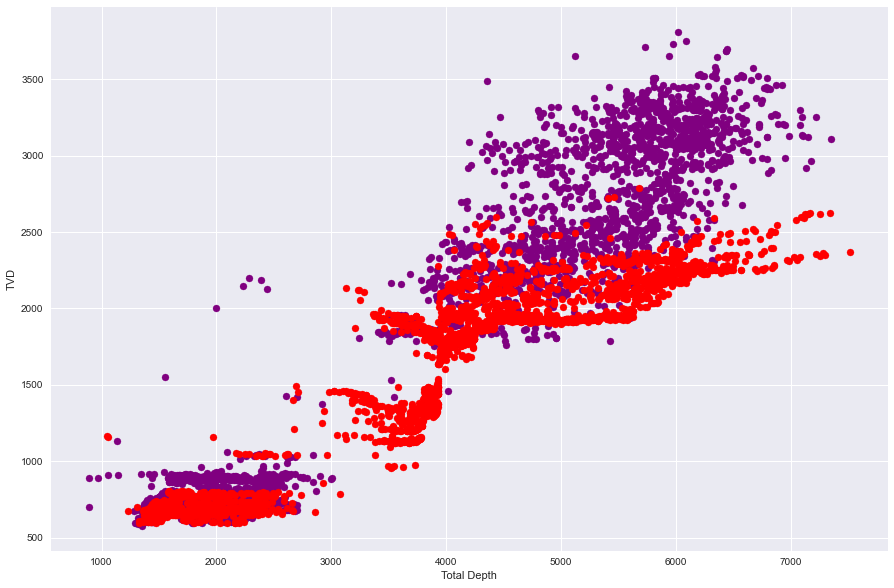

In [80]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Depth')
plt.ylabel('TVD')
plt.scatter(new_data['TotalDepth'], new_data['TVD'], color='purple')
plt.scatter(test_all['TotalDepth'], predicted_test, color='red')

In [81]:
fig1 = px.scatter(data_wells, x="TotalDepth", y="TVD")

fig1.show()

# Exporting the data

In [82]:
#Getting the data from the submission list for the EPAssetsID
sub_list=pd.read_csv('Submission_Sample.csv')

In [83]:
#Merging the test data and submission data to get the required predicted TVD's
data_merge=pd.merge(sub_list,test_all, on='EPAssetsId')
data_merge


,EPAssetsId,TVD_Sample_submission,TVD,Formation,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,Formation_Montney,Formation_Viking,TVD_predicted_RF
0,1161143,1740.949196,NaN,Viking,1470.7,-109.502778,51.817500,722.7,0,1,689.53275
1,2597084,244.915290,NaN,Montney,4569.0,-118.707755,54.689867,903.3,1,0,2097.80619
2,1164793,1046.683946,NaN,Viking,1487.0,-108.719917,51.642389,698.8,0,1,688.51536
3,1170291,794.188425,NaN,Viking,1925.0,-107.910257,51.081039,664.7,0,1,669.72335
4,2603236,1568.888132,NaN,Montney,4368.0,-117.627506,54.622943,898.9,1,0,1961.73862
...,...,...,...,...,...,...,...,...,...,...,...
1958,1159695,1079.563934,NaN,Viking,1429.0,-109.043862,51.512300,710.8,0,1,703.85142
1959,2612450,972.673541,NaN,Duvernay,6062.0,-117.061467,54.497447,766.7,0,0,2284.54242
1960,2607916,122.981610,NaN,Montney,5076.0,-119.902561,55.767238,764.2,1,0,1931.92501
1961,2602544,1921.057294,NaN,Viking,1658.0,-111.038505,51.985660,776.4,0,1,767.73169


In [54]:
#Exporting the results to excel
data_merge.to_csv('Submission 9thAugWholeNorm.csv')
